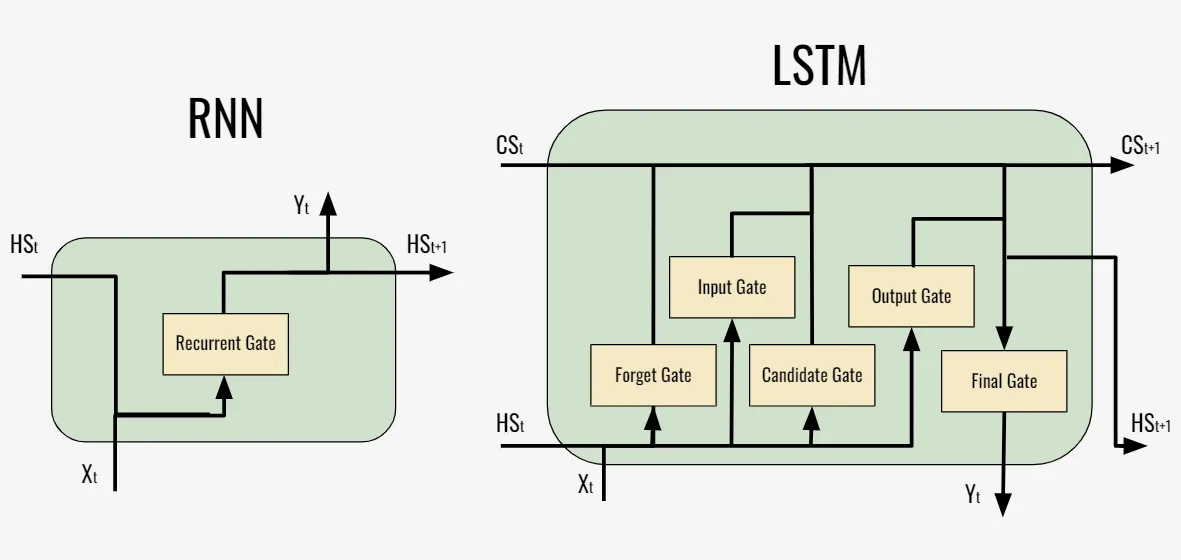

# FORGET GATE

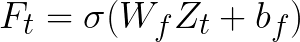

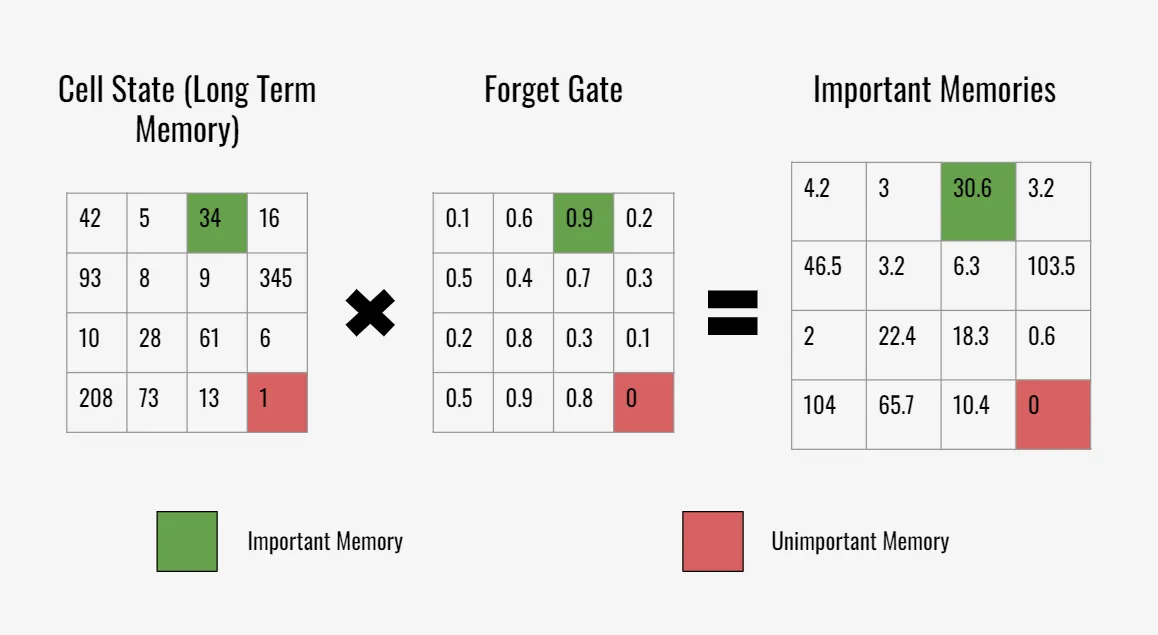

# Candidiate Gate
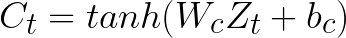

# Input Gate
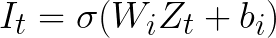

# Output Gate
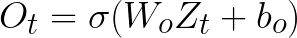

# Final Gate
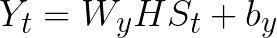

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

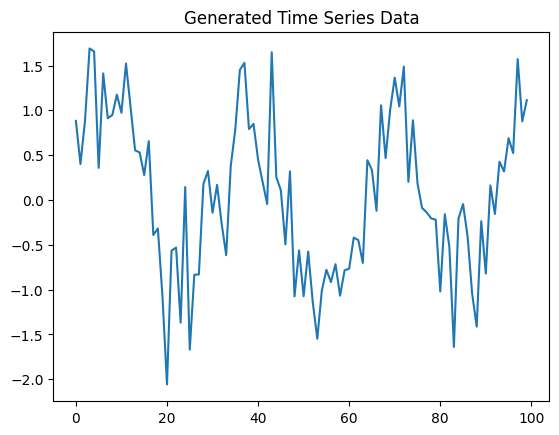

In [3]:
# Generate synthetic time series data
np.random.seed(0)
time_steps = 100
data = np.sin(np.linspace(0, 20, time_steps)) + np.random.normal(scale=0.5, size=time_steps)

# Plot the generated data
plt.plot(data)
plt.title("Generated Time Series Data")
plt.show()


In [4]:
data

array([ 0.88202617,  0.40072746,  0.8825056 ,  1.69008071,  1.65674156,
        0.35824662,  1.41140693,  0.91207609,  0.94736175,  1.1748552 ,
        0.97272723,  1.52235681,  1.03790911,  0.55365955,  0.53014063,
        0.2778972 ,  0.65643339, -0.39116619, -0.31829626, -1.06880801,
       -2.05908241, -0.56477496, -0.53209902, -1.36891029,  0.14412407,
       -1.6705641 , -0.83475935, -0.83060468,  0.17997963,  0.32272355,
       -0.14327226,  0.16852366, -0.26342594, -0.616247  ,  0.3786614 ,
        0.78678128,  1.45091991,  1.53013835,  0.79067525,  0.84854097,
        0.45010851,  0.19943697, -0.04561859,  1.6481302 ,  0.25577959,
        0.10866356, -0.49493069,  0.31863122, -1.07579205, -0.56300763,
       -1.07359206, -0.57617293, -1.1374888 , -1.5489868 , -1.01035376,
       -0.77916711, -0.91674245, -0.71679322, -1.0679125 , -0.78430859,
       -0.76683116, -0.42052637, -0.44767964, -0.70293257,  0.44372078,
        0.3344768 , -0.12114764,  1.05570146,  0.46749232,  1.00

In [5]:
data.shape

(100,)

In [6]:
# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Parameters
seq_length = 10

# Create sequences
X, y = create_sequences(data, seq_length)



In [7]:
X.shape

(90, 10)

In [8]:
y.shape

(90,)

In [9]:
import pandas as pd
import numpy as np
Data = pd.DataFrame(X)
Data

,0,1,2,3,4,5,6,7,8,9
0,0.882026,0.400727,0.882506,1.690081,1.656742,0.358247,1.411407,0.912076,0.947362,1.174855
1,0.400727,0.882506,1.690081,1.656742,0.358247,1.411407,0.912076,0.947362,1.174855,0.972727
2,0.882506,1.690081,1.656742,0.358247,1.411407,0.912076,0.947362,1.174855,0.972727,1.522357
3,1.690081,1.656742,0.358247,1.411407,0.912076,0.947362,1.174855,0.972727,1.522357,1.037909
4,1.656742,0.358247,1.411407,0.912076,0.947362,1.174855,0.972727,1.522357,1.037909,0.553660
...,...,...,...,...,...,...,...,...,...,...
85,-0.046332,-0.406103,-1.046182,-1.413429,-0.236947,-0.820800,0.162158,-0.156514,0.426681,0.318066
86,-0.406103,-1.046182,-1.413429,-0.236947,-0.820800,0.162158,-0.156514,0.426681,0.318066,0.689001
87,-1.046182,-1.413429,-0.236947,-0.820800,0.162158,-0.156514,0.426681,0.318066,0.689001,0.523141
88,-1.413429,-0.236947,-0.820800,0.162158,-0.156514,0.426681,0.318066,0.689001,0.523141,1.571938


In [10]:
Data["TV"] = y

In [11]:
Data.head(2)

,0,1,2,3,4,5,6,7,8,9,TV
0,0.882026,0.400727,0.882506,1.690081,1.656742,0.358247,1.411407,0.912076,0.947362,1.174855,0.972727
1,0.400727,0.882506,1.690081,1.656742,0.358247,1.411407,0.912076,0.947362,1.174855,0.972727,1.522357


In [12]:
Data.shape

(90, 11)

In [13]:
# Scale the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1))

# Reshape X to [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))


In [15]:
seq_length ## No of Columns

10

In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))  # First LSTM layer with return_sequences=True
model.add(LSTM(50, return_sequences=True))  # Second LSTM layer with return_sequences=True
model.add(LSTM(50))  # Third LSTM layer without return_sequences
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 8s 687ms/step - loss: 0.3197 - val_loss: 0.2440
Epoch 2/10
3/3 [==============================] - 0s 31ms/step - loss: 0.2050 - val_loss: 0.1433
Epoch 3/10
3/3 [==============================] - 0s 37ms/step - loss: 0.1046 - val_loss: 0.0635
Epoch 4/10
3/3 [==============================] - 0s 31ms/step - loss: 0.0578 - val_loss: 0.0670
Epoch 5/10
3/3 [==============================] - 0s 33ms/step - loss: 0.1021 - val_loss: 0.0583
Epoch 6/10
3/3 [==============================] - 0s 34ms/step - loss: 0.0709 - val_loss: 0.0591
Epoch 7/10
3/3 [==============================] - 0s 30ms/step - loss: 0.0539 - val_loss: 0.0714
Epoch 8/10
3/3 [==============================] - 0s 31ms/step - loss: 0.0595 - val_loss: 0.0763
Epoch 9/10
3/3 [==============================] - 0s 34ms/step - loss: 0.0614 - val_loss: 0.0688
Epoch 10/10
3/3 [==============================] - 0s 30ms/step - loss: 0.0562 - val_loss: 0.0589


3/3 [==============================] - 1s 7ms/step


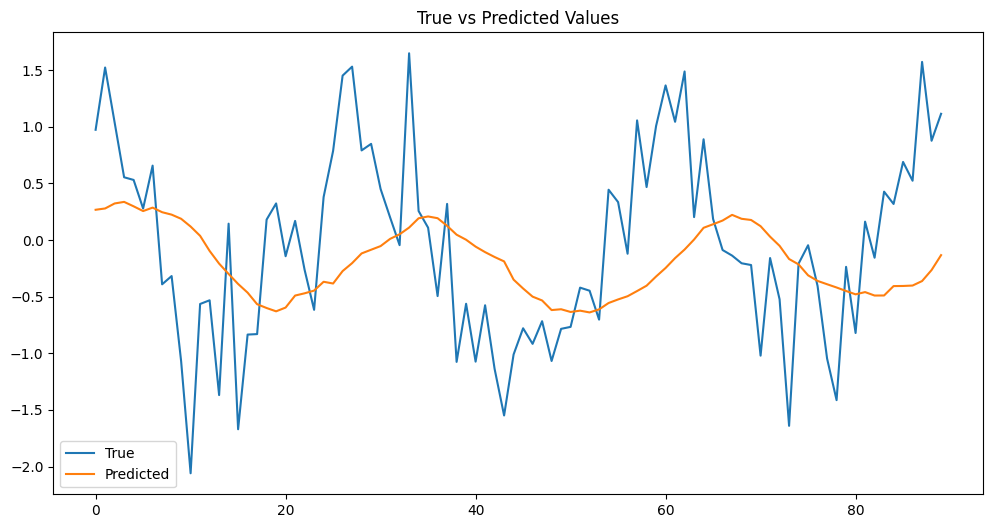

In [18]:
# Predict the next value
predicted = model.predict(X)

# Inverse scale the predictions and actual values
predicted = scaler.inverse_transform(predicted)
y = scaler.inverse_transform(y)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y, label='True')
plt.plot(predicted, label='Predicted')
plt.title("True vs Predicted Values")
plt.legend()
plt.show()

# Bi-Directional LSTM

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(seq_length, 1)))  # First BiDirectional LSTM layer with return_sequences=True
model.add(Bidirectional(LSTM(50, return_sequences=True)))  # Second BiDirectional LSTM layer with return_sequences=True
model.add(Bidirectional(LSTM(50)))  # Third BiDirectional LSTM layer without return_sequences
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
#history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

# Attention Mechanism

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, RepeatVector, Permute, Multiply
from tensorflow.keras import backend as K

In [ ]:
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], input_shape[-1]),
                                 initializer='glorot_uniform', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[-1],),
                                 initializer='zeros', trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)


In [ ]:
input_layer = Input(shape=(seq_length, 1))
lstm_layer = Bidirectional(LSTM(50, return_sequences=True))(input_layer)
lstm_layer = Bidirectional(LSTM(50, return_sequences=True))(lstm_layer)
lstm_layer = Bidirectional(LSTM(50, return_sequences=True))(lstm_layer)
lstm_layer

<KerasTensor: shape=(None, 10, 100) dtype=float32 (created by layer 'bidirectional_5')>

In [ ]:
attention_layer = Attention()(lstm_layer)
output_layer = Dense(1)(attention_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Print the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 10, 100)           20800     
 onal)                                                           
                                                                 
 bidirectional_4 (Bidirecti  (None, 10, 100)           60400     
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 10, 100)           60400     
 onal)                                                           
                                                                 
 attention (Attention)       (None, 100)               10100     
                                                             

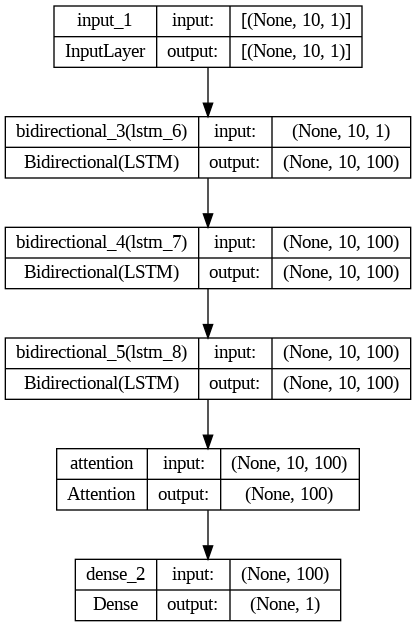

In [ ]:


from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Epoch 1/20
3/3 [==============================] - 13s 987ms/step - loss: 0.7136 - val_loss: 0.6912
Epoch 2/20
3/3 [==============================] - 0s 27ms/step - loss: 0.6977 - val_loss: 0.6887
Epoch 3/20
3/3 [==============================] - 0s 26ms/step - loss: 0.6972 - val_loss: 0.6916
Epoch 4/20
3/3 [==============================] - 0s 27ms/step - loss: 0.6966 - val_loss: 0.6860
Epoch 5/20
3/3 [==============================] - 0s 25ms/step - loss: 0.6873 - val_loss: 0.6714
Epoch 6/20
3/3 [==============================] - 0s 31ms/step - loss: 0.6756 - val_loss: 0.6594
Epoch 7/20
3/3 [==============================] - 0s 27ms/step - loss: 0.6586 - val_loss: 0.6463
Epoch 8/20
3/3 [==============================] - 0s 27ms/step - loss: 0.6418 - val_loss: 0.6251
Epoch 9/20
3/3 [==============================] - 0s 44ms/step - loss: 0.6101 - val_loss: 0.5900
Epoch 10/20
3/3 [==============================] - 0s 44ms/step - loss: 0.5764 - val_loss: 0.5402
Epoch 11/20
3/3 [==========

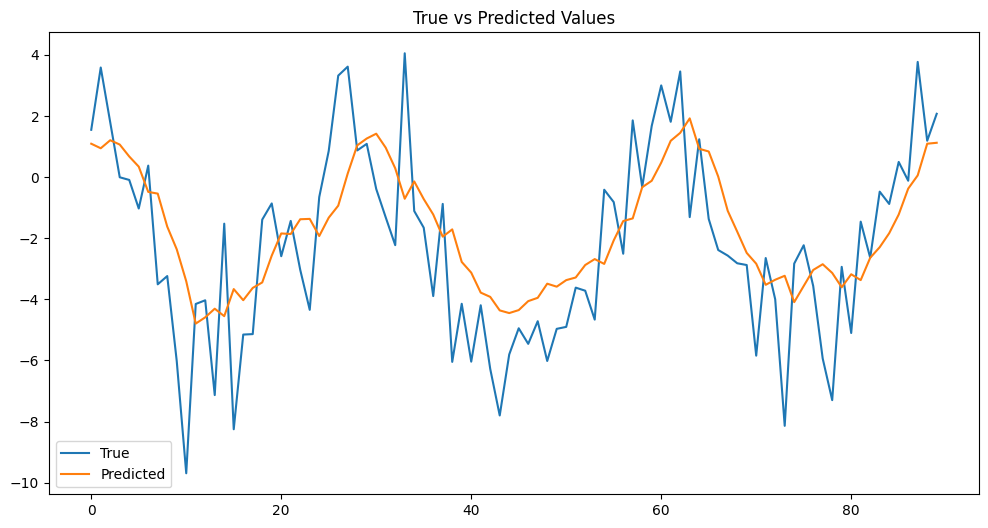

In [ ]:
# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

# Predict the next value
predicted = model.predict(X)

# Inverse scale the predictions and actual values
predicted = scaler.inverse_transform(predicted)
y = scaler.inverse_transform(y)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y, label='True')
plt.plot(predicted, label='Predicted')
plt.title("True vs Predicted Values")
plt.legend()
plt.show()